In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

from prepare_2 import wrangle_data

random_state = 42

In [2]:
df, sale_df, rent_df = wrangle_data()

In [3]:
sale_df.shape, rent_df.shape

((3571, 66), (718, 66))

In [4]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 4288
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   address_id                             3571 non-null   object        
 1   listingcontractdate                    3571 non-null   datetime64[ns]
 2   originallistprice                      3571 non-null   float64       
 3   propertysubtype                        3571 non-null   object        
 4   lotsizearea                            3571 non-null   float64       
 5   bedroomstotal                          3571 non-null   float64       
 6   bathroomstotalinteger                  3571 non-null   float64       
 7   bathroomsfull                          3571 non-null   float64       
 8   bathroomshalf                          3571 non-null   float64       
 9   livingarea                             3571 non-null   float64 

In [5]:
target = 'newconstructionyn'

## Distribution of Target Variable

In [6]:
df[target].value_counts(normalize=True)

False    0.792492
True     0.207508
Name: newconstructionyn, dtype: float64

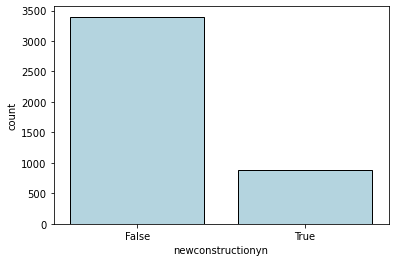

In [7]:
sns.countplot(data=df, x=target, color='lightblue', ec='black')
plt.show()

## Univariate Exploration

### Build Year

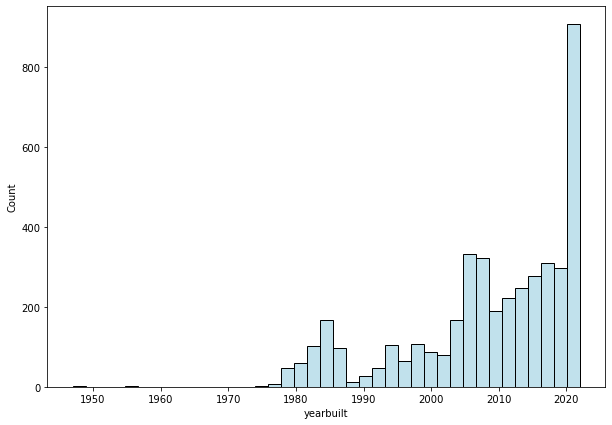

In [8]:
plt.figure(figsize=(10,7))
sns.histplot(df.yearbuilt, color='lightblue')
plt.show()

### Listing Date

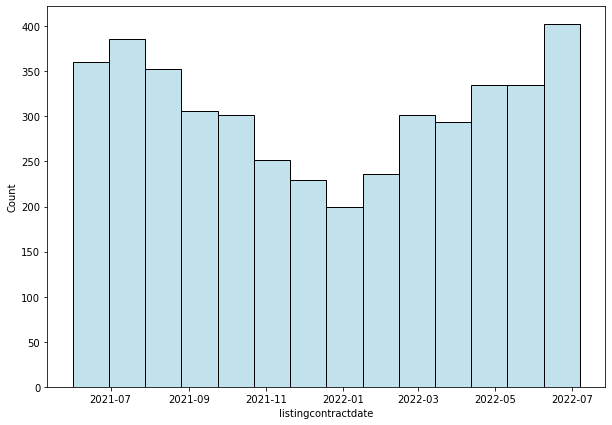

In [9]:
plt.figure(figsize=(10,7))
sns.histplot(df.listingcontractdate, color='lightblue')
plt.show()

#### Listing Month

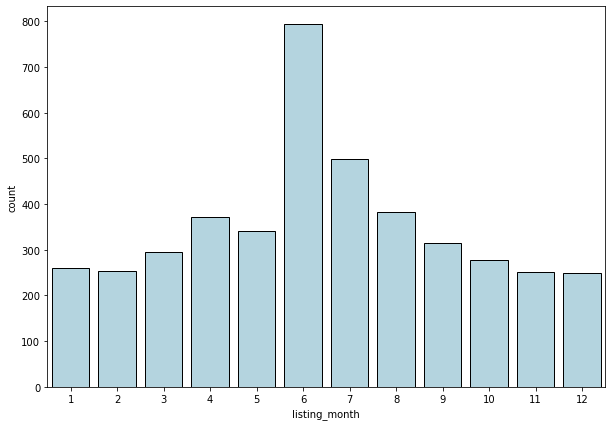

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(df.listing_month, color='lightblue', ec='black')
plt.show()

#### Listing Day-of-Month

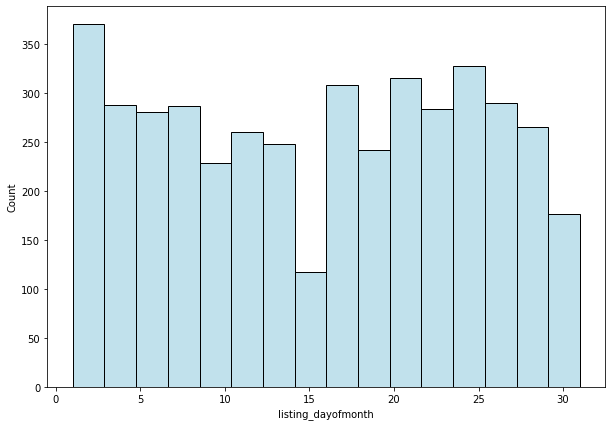

In [11]:
plt.figure(figsize=(10,7))
sns.histplot(df.listing_dayofmonth, color='lightblue')
plt.show()

#### Listing Day-of-Week

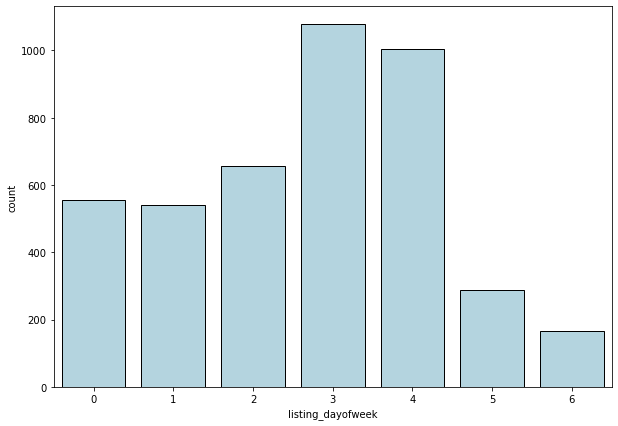

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(df.listing_dayofweek, color='lightblue', ec='black')
plt.show()

## Price

### Total Price

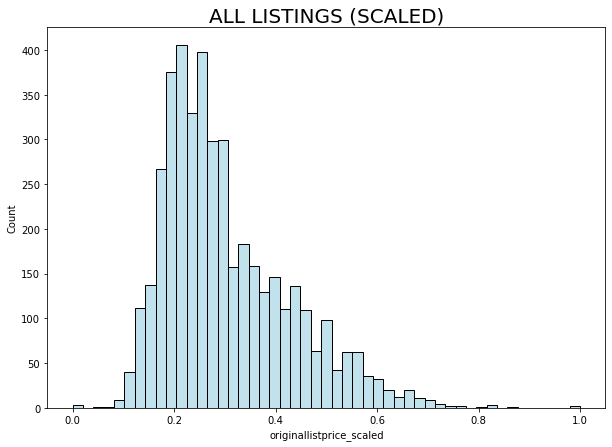

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(df.originallistprice_scaled, color='lightblue')
plt.title('ALL LISTINGS (SCALED)', fontsize=20)
plt.show()

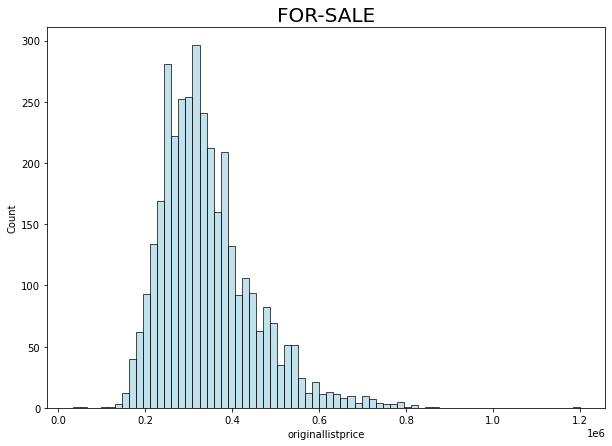

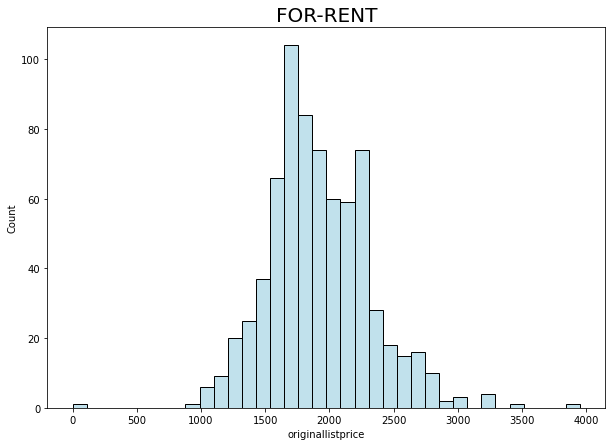

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.originallistprice, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.originallistprice, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

### Price-per-sqft

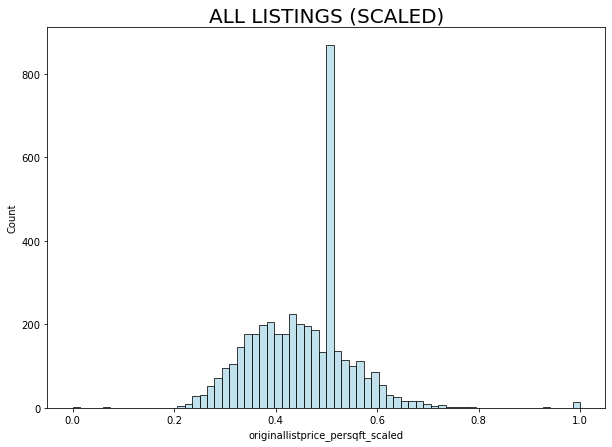

In [15]:
plt.figure(figsize=(10,7))
sns.histplot(df.originallistprice_persqft_scaled, color='lightblue')
plt.title('ALL LISTINGS (SCALED)', fontsize=20)
plt.show()

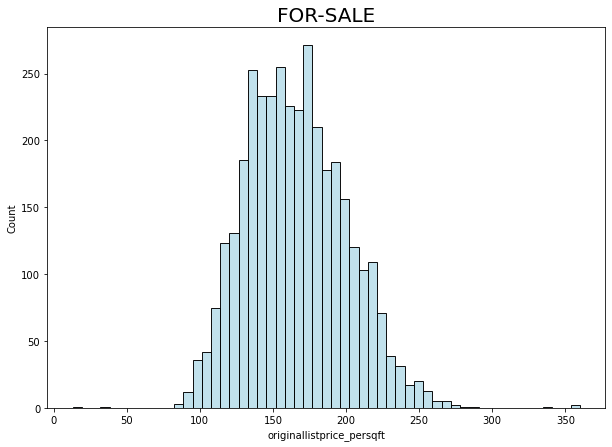

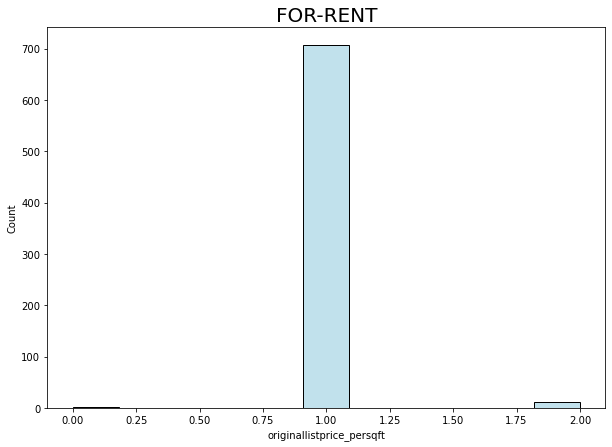

In [16]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.originallistprice_persqft, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.originallistprice_persqft, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

Since rental price-per-sqft is so heavily concetrated around the mean, it drastically alters the distribution of the dataset, as compared to the distribution of only for-sale listings. It seems that even after scaling, it is difficult to compare for-rent to for-sale listings in terms of price. Perhaps it may help to remove outliers from the rental price-per-sqft column. 

### Living Area

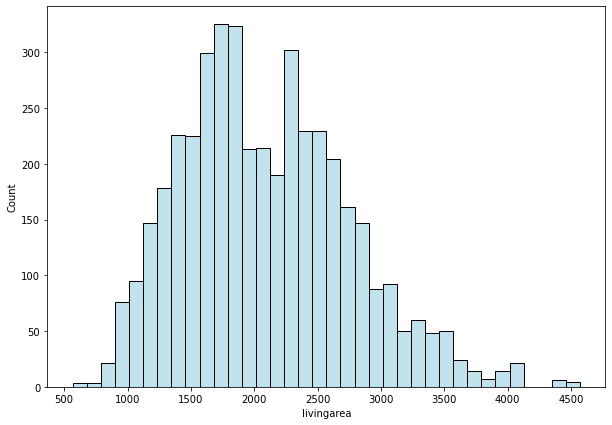

In [17]:
plt.figure(figsize=(10,7))
sns.histplot(df.livingarea, color='lightblue')
plt.show()

### Lot Size

In [18]:
# plt.figure(figsize=(10,7))
# sns.histplot(sale_df.lotsizearea, color='lightblue')
# plt.title('FOR-SALE', fontsize=20)
# plt.show()

# plt.figure(figsize=(10,7))
# sns.histplot(rent_df.lotsizearea, color='lightblue')
# plt.title('FOR-RENT', fontsize=20)
# plt.show()

## Splitting the Data: Train & Test

In [19]:
def split_data(df):
    train, test = train_test_split(df, test_size=.3, random_state=random_state, stratify=df[target])
    return train, test

train, test = split_data(df)

## Bivariate Exploration: Variables as they relate to the target variable

### Build Year
First, we should examine build year, as this might be assumed to be the factor most strongly correlated with whether a property is new construction.

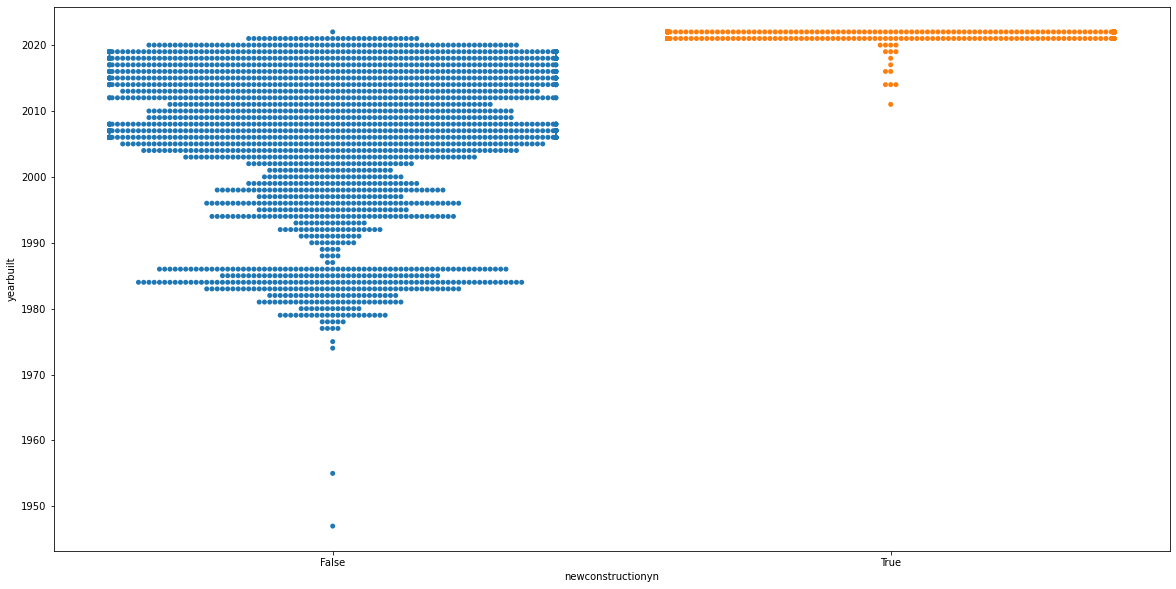

In [20]:
plt.figure(figsize=(20,10))
sns.swarmplot(data=train, y='yearbuilt', x='newconstructionyn')
plt.show()

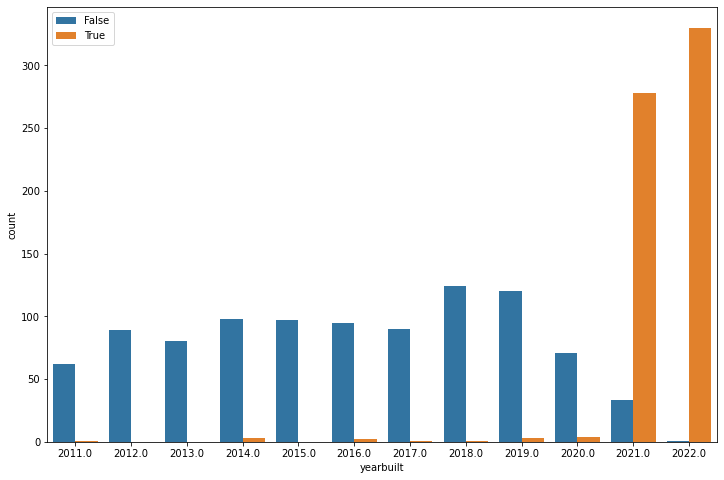

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(data=train[train.yearbuilt > 2010], x='yearbuilt', hue=target)
plt.legend(loc='upper left')
plt.show()

It seems that build year is a fairly reliable predictor of whether a property is new construction, though we would need to consider other factors to account for instances where this is not the case. 

We will now explore build year as it relates to the listing date.

#### Whether a property was built in the last two calendar years and whether it is new construction:

In [22]:
pd.crosstab(train[target], train.built_last_two_years)

built_last_two_years,False,True
newconstructionyn,,
False,2312,67
True,11,612


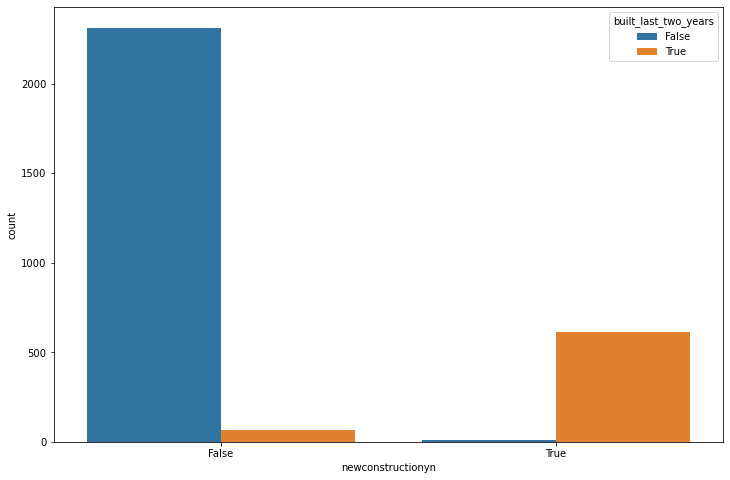

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(data=train, x=target, hue='built_last_two_years')
plt.show()

Here we see that whether a property's listed build year was within the last two years is likely to be predictive of whether the property is new construction, though this feature alone is not completely reliable. 

#### Do new builds have higher list prices than existing homes?

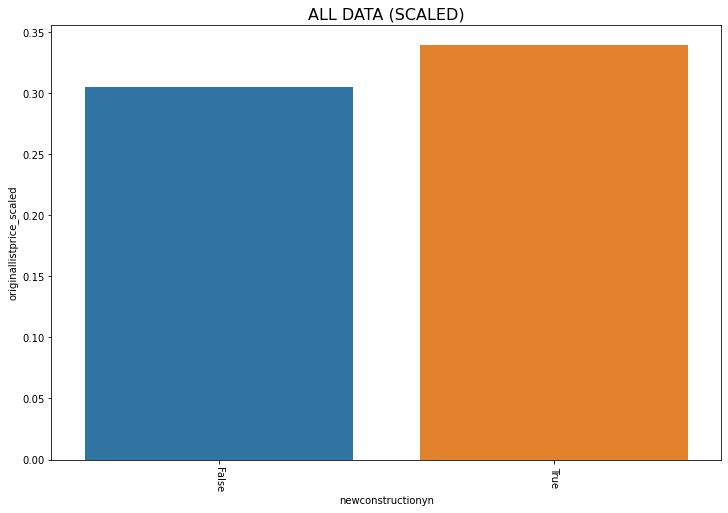

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(data=train[train.yearbuilt>1990], 
            x=target, 
            y='originallistprice_scaled', 
            ci=None)
plt.title('ALL DATA (SCALED)', fontsize=16)
plt.xticks(rotation=270)
plt.show()

It does appear that new builds have a higher list price than existing homes (though we should use statistical testing to determine whether this difference is significant). That seems fairly obvious, however. We should also control for build year to see whether this is simply due to the age of the home, rather than whether it is categorized as newconstruction.

#### Do new builds have higher list prices than existing homes (when controlling for build year)?

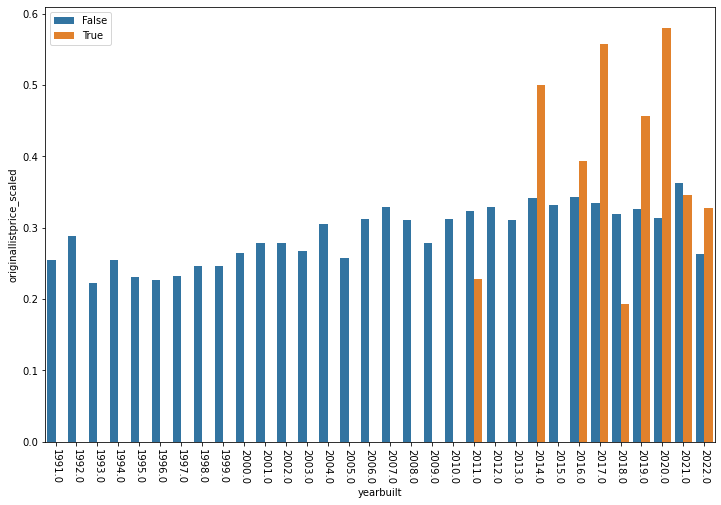

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(data=train[train.yearbuilt>1990], 
            x='yearbuilt', 
            y='originallistprice_scaled', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.show()

Here this appears inconclusive. We might expect this kind of high variance in average price in most build years, since there are relatively few observations within each build year, especially in the new construction category. We therefore may want to examine this on a binary basis, comparing homes built within the last two years to those built earlier. 

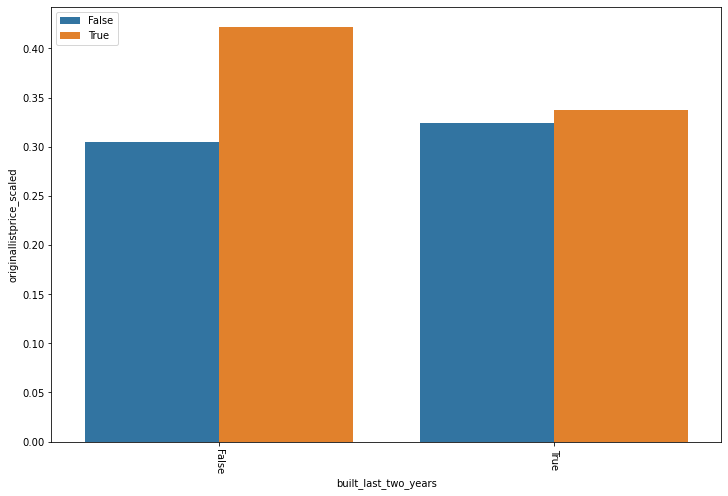

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=train[train.yearbuilt>1990], 
            x='built_last_two_years', 
            y='originallistprice_scaled', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.show()

Here we see that for both categories, new construction has a higher average price. Though this difference is relatively small for properties with build years in the last twotwo years. (A larger difference for older build years is consistent with the hypothesis that newconstruction with older listed build years represents an error in the listing for build year rather than a property which is several years old yet has had 0 occupants.) 

Some statistical testing could confirm whether these differences are significant.

#### What about price-per-square-foot? Do new builds have a higher average price-per-sqft than existing homes?

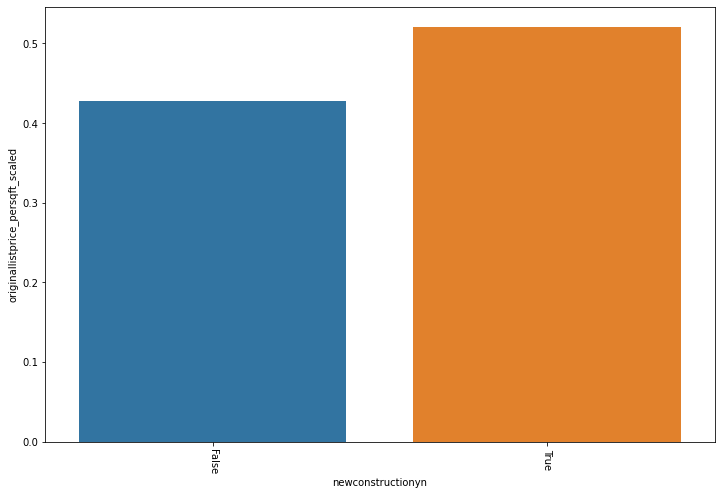

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(data=train[train.yearbuilt>1990], 
            x=target, 
            y='originallistprice_persqft_scaled', 
            ci=None)
plt.xticks(rotation=270)
plt.show()

Again we see what appears to be a significant difference in average price. Does this hold true when controlling for build year?

#### Price-per-sqft when controlling for build year

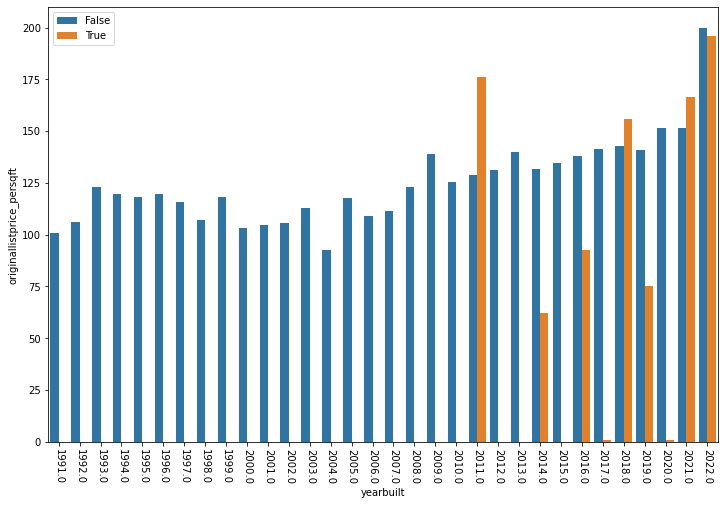

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data=train[train.yearbuilt>1990], 
            x='yearbuilt', 
            y='originallistprice_persqft', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.show()

Again, this appears inconclusive, likely due to a low sample size of new-builds in most years. Again, we now compare homes built within the last two years to those built earlier. 

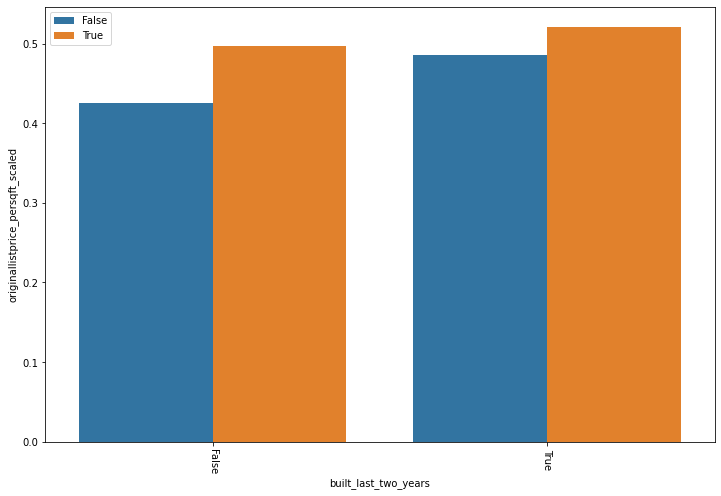

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(data=train[train.yearbuilt>1990], 
            x='built_last_two_years', 
            y='originallistprice_persqft_scaled', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.show()

Here we see a pretty consistent difference across both categories. 

### It seems unlikely that a new build would ever NOT have central heating or cooling. Let's take a look.

#### Heating

In [30]:
pd.crosstab(train.heating_central, train[target])

newconstructionyn,False,True
heating_central,,
False,51,16
True,2328,607


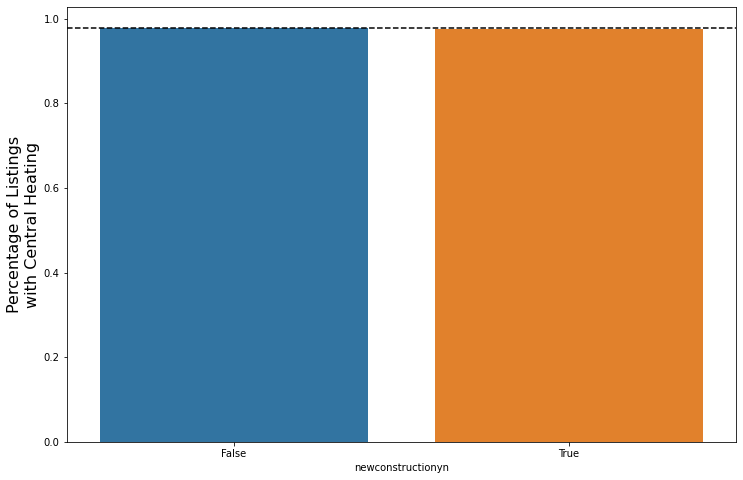

In [51]:
heating_central_rates = (pd.DataFrame(train.groupby(by=target).mean().heating_central)
                         .reset_index()
                         .sort_values(by='heating_central'))
plt.figure(figsize=(12,8))
sns.barplot(data=heating_central_rates, 
            x=target,
            y='heating_central')
plt.axhline(train.heating_central.mean(), ls='--', color='black')
plt.ylabel('Percentage of Listings\nwith Central Heating', fontsize=16)
plt.show()

It seems that most homes have central heating, regardless of whether they are new construction. This is likely not a useful feature. 

#### Cooling

In [32]:
pd.crosstab(train.cooling_central, train[target])

newconstructionyn,False,True
cooling_central,,
False,1,5
True,2378,618


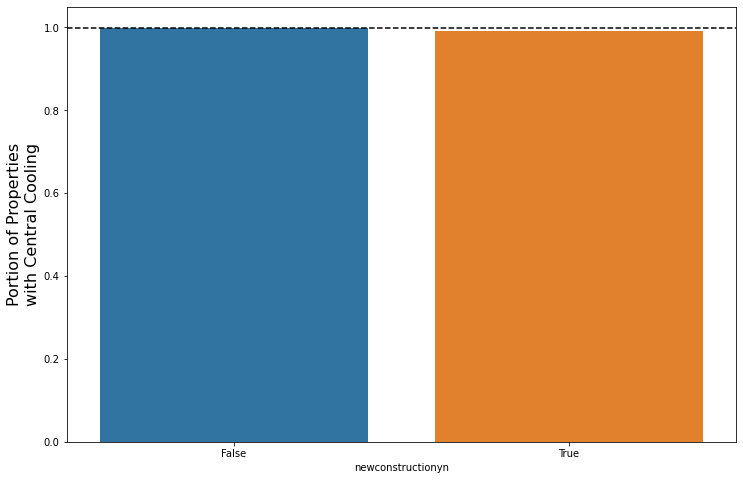

In [33]:
cooling_central_rates = (pd.DataFrame(train.groupby(by=target).mean().cooling_central)
                         .reset_index()
                         .sort_values(by='cooling_central'))
plt.figure(figsize=(12,8))
sns.barplot(data=cooling_central_rates, 
            x=target,
            y='cooling_central')
plt.axhline(train.cooling_central.mean(), ls='--', color='black')
plt.ylabel('Portion of Properties\nwith Central Cooling', fontsize=16)
plt.show()

Again, it seems that most homes have central cooling, regardless of whether they are new construction. This is likely not a useful feature. 

### It also seems that a newly constructed home would be less likely to have window or wall cooling units. Let's take a look:

In [34]:
pd.crosstab(train[target], train.cooling_windowwall)

cooling_windowwall,False,True
newconstructionyn,,
False,2371,8
True,623,0


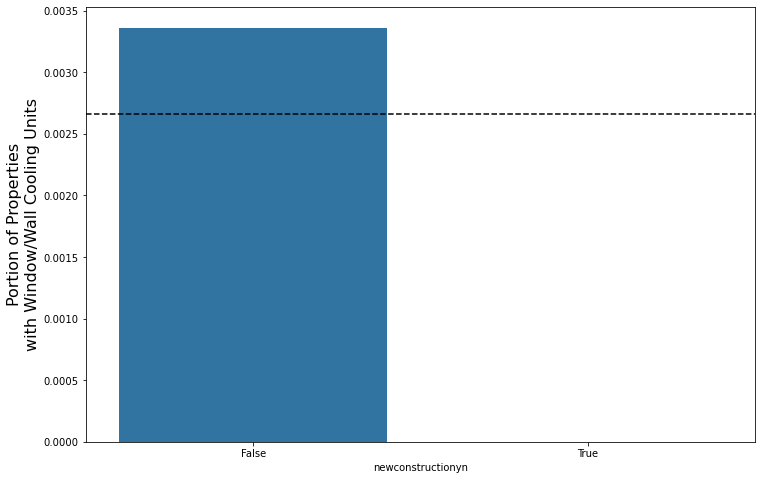

In [35]:
cooling_windowwall_rates = (pd.DataFrame(train.groupby(by=target).mean().cooling_windowwall)
                         .reset_index()
                         .sort_values(by='cooling_windowwall'))
plt.figure(figsize=(12,8))
sns.barplot(data=cooling_windowwall_rates, 
            x=target,
            y='cooling_windowwall')
plt.axhline(train.cooling_windowwall.mean(), ls='--', color='black')
plt.ylabel('Portion of Properties\nwith Window/Wall Cooling Units', fontsize=16)
plt.show()

It appears that none of the new construction properties in our dataset have window/wall cooling units. However, these units are very rare in the dataset at large. Making this unlikely to be a useful feature anyway. 

#### Do new construction properties differ from existing properties in the number of stories?
Anecdotally, new builds in my area are much more likely to be multi-story than older homes, so perhaps this is true in our dataset as well. 

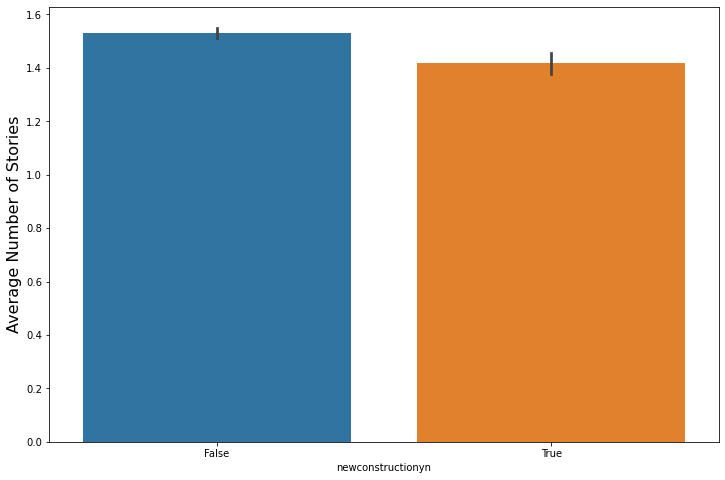

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(data=train, x=target, y='stories')
plt.ylabel('Average Number of Stories', fontsize=16)
plt.show()

It appears that older homes actually tend to have a higher number of stories, though this difference is small, and we should test whether this is statistically significant. It might also be useful to examine this as a categorical variable (1 story vs 2 vs 3 or more). 

### Multivariate exploration

Now, I'll take a more shotgun approach at exploring whether any combinations of two variables appear to be possible predictors of new construction.

No mutually exclusive clusters of points are immediately identified here, so perhaps combinations ofthese variables are not useful in determining new construction. 

In [37]:
cols = ['livingarea', 'bedroomstotal', 'bathroomstotalinteger', 'stories', 
        'originallistprice', 'originallistprice_persqft', 
        'listing_dayofmonth', 'listing_month', 'lotsizearea', 'garage_size']
sns.pairplot(train[cols + [target]], hue=target, corner=True)
plt.show()

KeyboardInterrupt: 

One thing I notice here is that there is no new construction with a garage size of 0 (no garage). There is also no new construction with a lot size greater than 1, and very few greater than .5. Let's explore these things in more depth.

#### Are new builds more likely to have a garage?

In [38]:
garage_rates = (pd.DataFrame(train.groupby(by=target).mean().garageyn)
                             .reset_index()
                             .sort_values(by='garageyn'))
garage_rates

,newconstructionyn,garageyn
0,False,0.986129
1,True,1.000000


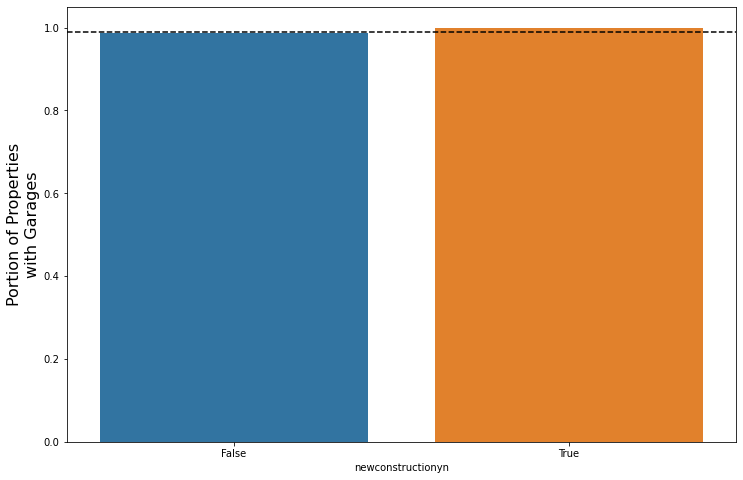

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(data=garage_rates, 
            x=target,
            y='garageyn')
plt.axhline(train.garageyn.mean(), ls='--', color='black')
plt.ylabel('Portion of Properties\nwith Garages', fontsize=16)
plt.show()

While it is true that no new construction is without a garage, very few homes in the dataset at large are without a garage, so this may not be an especially useful feature.

#### Are new builds likely to have a smaller lot size?

removing lotsize greater than 1 for easier visualization. 

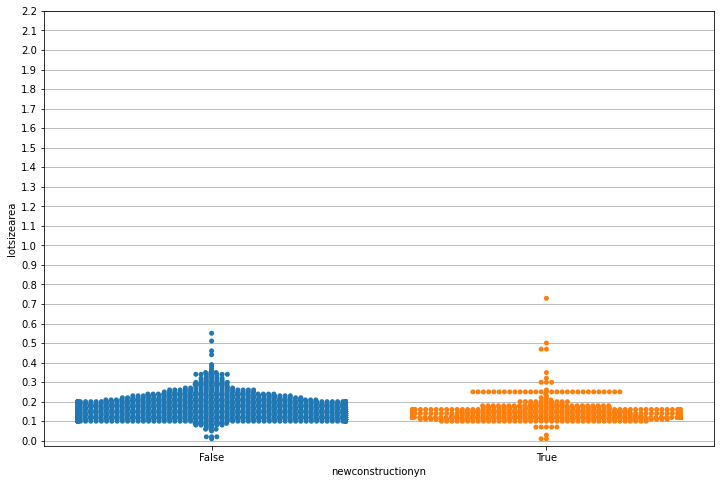

In [40]:
plt.figure(figsize=(12,8))
sns.swarmplot(data=train[train.lotsizearea < 1], x=target, y='lotsizearea')
plt.grid()
plt.grid(axis='x')
plt.yticks(np.arange(0, round(sale_df.lotsizearea.max(), 1),.1))
plt.show()

We can see here that there may be a cutoff point around .2 or .3 where a home with a lot size smaller than that cutoff point is much more likely to be new construction, at least in for-sale listings.

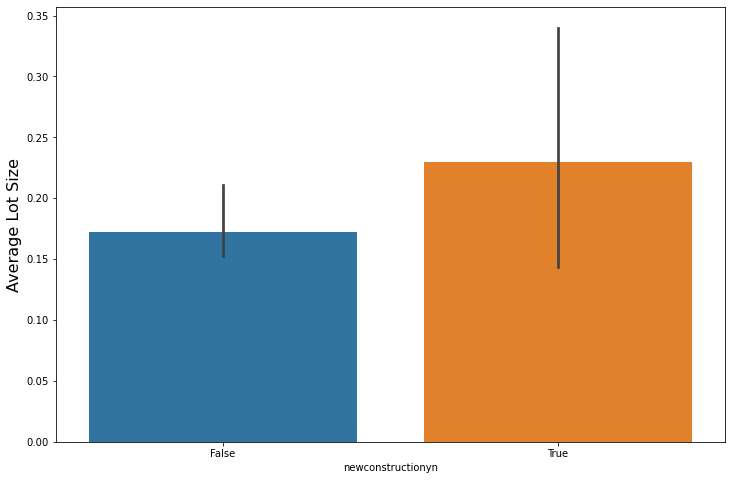

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x=target, y='lotsizearea')
plt.ylabel('Average Lot Size', fontsize=16)
plt.show()

What happens when we remove lot sizes greater than 1 (likely to be outliers)?

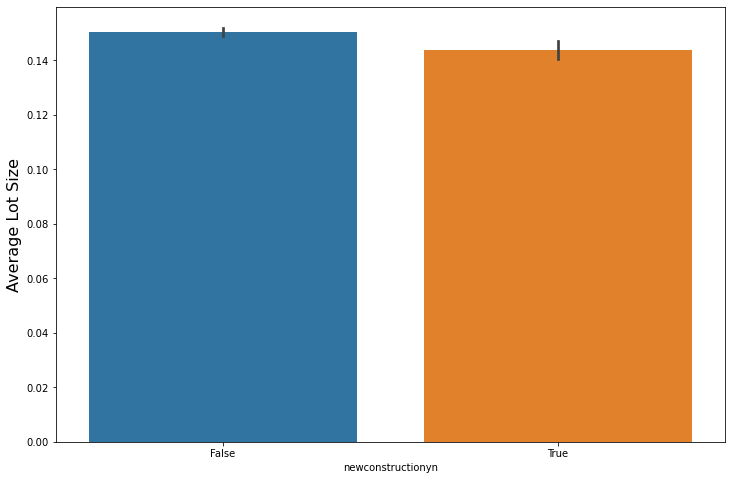

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(data=df[df.lotsizearea < 1], x=target, y='lotsizearea')
plt.ylabel('Average Lot Size', fontsize=16)
plt.show()

Here we see new construction with a smaller average lot size, though we should test to determine statistical significane of this difference. 

#### Are new builds more likely to have small lot sizes? (0.2 or less)

In [43]:
lotsizearea_small_rates = (pd.DataFrame(df.groupby(by=target).mean().lotsizearea_small)
                             .reset_index()
                             .sort_values(by='lotsizearea_small'))
lotsizearea_small_rates

,newconstructionyn,lotsizearea_small
0,False,0.900265
1,True,0.914607


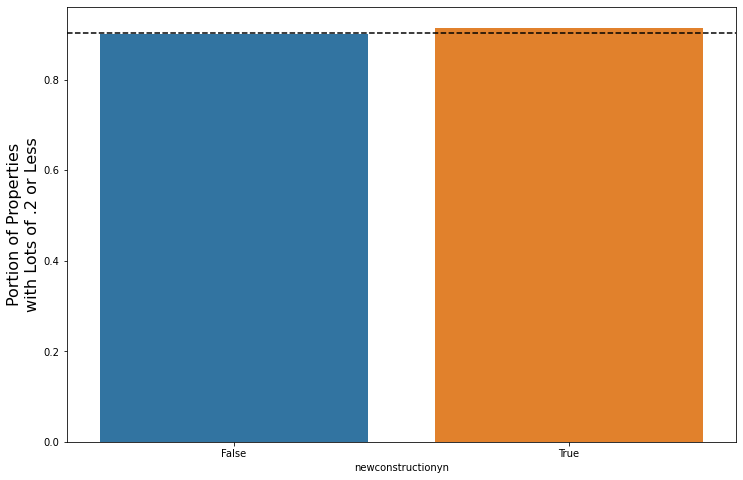

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(data=lotsizearea_small_rates, 
            x=target,
            y='lotsizearea_small')
plt.axhline(df.lotsizearea_small.mean(), ls='--', color='black')
plt.ylabel('Portion of Properties\nwith Lots of .2 or Less', fontsize=16)
plt.show()

Very small difference here - we should test for significance. 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 4288
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   address_id                             4289 non-null   object        
 1   listingcontractdate                    4289 non-null   datetime64[ns]
 2   originallistprice                      4289 non-null   float64       
 3   propertytype                           4289 non-null   object        
 4   propertysubtype                        4289 non-null   object        
 5   lotsizearea                            4289 non-null   float64       
 6   bedroomstotal                          4289 non-null   float64       
 7   bathroomstotalinteger                  4289 non-null   float64       
 8   bathroomsfull                          4289 non-null   float64       
 9   bathroomshalf                          4289 non-null   float64 

#### Are new builds less likely to have a previous listing?

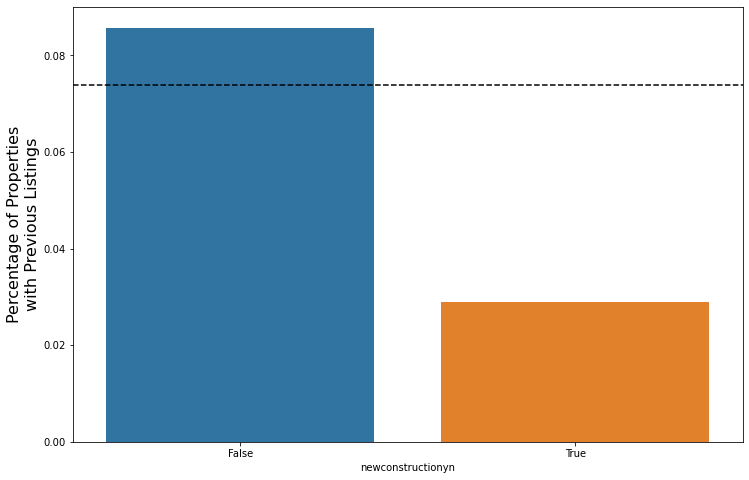

In [52]:
previously_listed_rates = (pd.DataFrame(train.groupby(by=target).mean().previously_listed)
                         .reset_index()
                         .sort_values(by='previously_listed'))
plt.figure(figsize=(12,8))
sns.barplot(data=previously_listed_rates, 
            x=target,
            y='previously_listed')
plt.axhline(train.previously_listed.mean(), ls='--', color='black')
plt.ylabel('Percentage of Properties\nwith Previous Listings', fontsize=16)
plt.show()

It does appear that new construction is much less likely to have a previous listing. This would be an even more reliable metric if our dataset included historical data for the area going back for many years. 